# 【問題1】練習のために特徴量とカテゴリを選択

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris_data = load_iris()

In [2]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
X = pd.DataFrame(iris_data.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])

# pandasデータに変換。目的変数（ターゲット）が対象。
y = pd.DataFrame(iris_data.target, columns=["Species"])

In [4]:
# 'setosa' = 0, 'virgiclor' = 1, 'virginca' = 2
df = pd.concat([X,y],axis = 1)
df1 = df.query("Species != 0").drop(["sepal_width","petal_width"], axis = 1)
df1

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


## 【問題2】データの分析

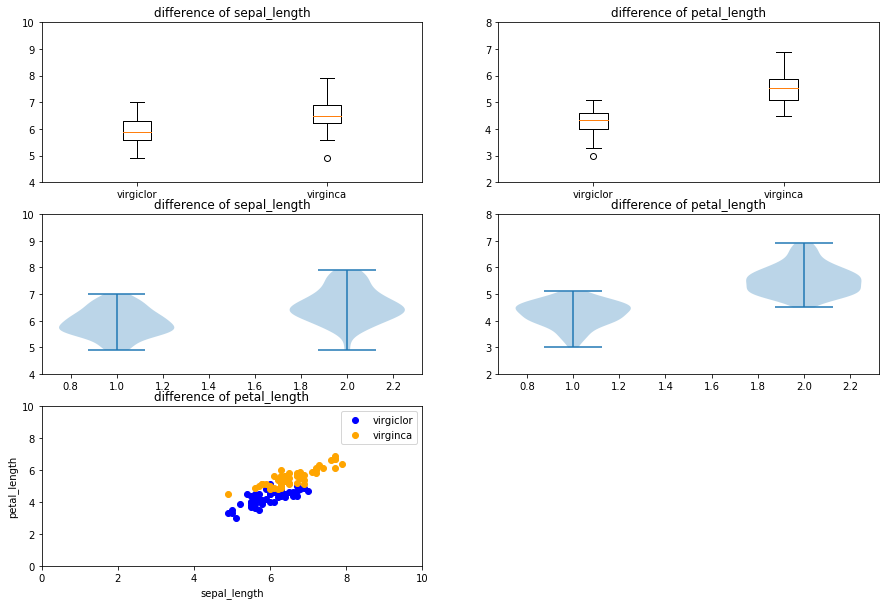

In [5]:
samp1_s = df.query("Species == 1")['sepal_length']
samp1_p = df.query("Species == 1")['petal_length']
samp2_s = df.query("Species == 2")['sepal_length']
samp2_p = df.query("Species == 2")['petal_length']

#plt.subplot(2,2,4)
#plt.title("petal width (cm)")
samp_label = ['virgiclor', 'virginca']

plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.title("difference of sepal_length")
plt.boxplot([samp1_s, samp2_s], labels = samp_label)
plt.ylim(4.0,10.0)

plt.subplot(3,2,2)
plt.title("difference of petal_length")
plt.boxplot([samp1_p, samp2_p], labels = samp_label)
plt.ylim(2.0,8.0)

plt.subplot(3,2,3)
plt.title("difference of sepal_length")
plt.violinplot([samp1_s, samp2_s])
plt.ylim(4.0, 10.0)

plt.subplot(3,2,4)
plt.title("difference of petal_length")
plt.violinplot([samp1_p, samp2_p])
plt.ylim(2.0, 8.0)

plt.subplot(3,2,5)
plt.title("difference of petal_length")
plt.scatter(samp1_s, samp1_p, color = 'b',label = samp_label[0])
plt.scatter(samp2_s, samp2_p, color = 'orange', label = samp_label[1])
plt.xlim(0.0, 10.0)
plt.ylim(0.0, 10.0)
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()
plt.show()

# 問題３　前処理・訓練用データと検証用データの分割

In [24]:
from sklearn.model_selection import train_test_split

X1 = df1.iloc[:,0:2].values
y1 = df1.iloc[:,2].values

X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.25)
#print(X_train)

# 問題４　前処理・標準化

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# X_trainのみでfit。そしてX_trainとX_testでtransformする。
scaler.fit(X_train,y_train)
norml_X_train = scaler.transform(X_train)
norml_X_test = scaler.transform(X_test)

# 問題５　学習と推定  
　上から順に、５＿ｎｎ、３＿ｎｎ、１＿ｎｎ

In [26]:
from sklearn.neighbors import KNeighborsClassifier

#標準化されたデータ（norml_X_train)で学習モデル作成
neigh5 = KNeighborsClassifier(n_neighbors=5)
kn_5_nn = neigh5.fit(norml_X_train, y_train)

#学習済みモデルに、テストデータ（norml_X_test）を入力
print("推定結果５_ｎｎ：{}".format(neigh5.predict(norml_X_test)))
#print("推定結果：{}".format(kn_5_nn.predict(norml_X_test)))

estimate_result5 = neigh5.predict(norml_X_test)

推定結果５_ｎｎ：[1 2 1 2 1 2 2 1 1 1 2 2 1 1 1 1 2 1 1 2 2 1 2 1 2]


In [27]:
#標準化されたデータ（norml_X_train)で学習モデル作成
neigh3 = KNeighborsClassifier(n_neighbors=3)
kn_3_nn = neigh3.fit(norml_X_train, y_train)

#学習済みモデルに、テストデータ（norml_X_test）を入力
print("推定結果３_ｎｎ：{}".format(neigh3.predict(norml_X_test)))
#print("推定結果：{}".format(kn_3_nn.predict(norml_X_test))

estimate_result3 = neigh3.predict(norml_X_test)

推定結果３_ｎｎ：[1 2 1 2 1 2 2 1 1 1 2 2 1 1 2 1 2 1 1 2 2 1 2 1 2]


In [28]:
#標準化されたデータ（norml_X_train)で学習モデル作成
neigh1 = KNeighborsClassifier(n_neighbors=1)
kn_1_nn = neigh1.fit(norml_X_train, y_train)

#学習済みモデルに、テストデータ（norml_X_test）を入力
print("推定結果１_ｎｎ：{}".format(neigh1.predict(norml_X_test)))
#print("推定結果：{}".format(kn_1_nn.predict(norml_X_test)))

estimate_result1 = neigh1.predict(norml_X_test)

推定結果１_ｎｎ：[1 2 1 2 1 2 2 1 1 1 2 2 1 1 2 1 2 1 1 2 2 1 1 1 2]


# 問題６  評価  

　・Accuracy（正解率）：　学習モデルによる予測と、テストデータの結果とが一致している確率。  
  すなわち（Ａ＋Ｄ）／（Ａ＋Ｂ＋Ｃ＋Ｄ）となる。 
    
  ・Precision（適合率）：　学習モデルによる予測が「virgiclor」である場合に、テストデータとの結果が一致している確率。  
  すなわちＡ／（Ａ＋Ｂ）となる。  
    
   Recall（再現率）：テストデータの結果が「virgiclor」である場合に、学習モデルによる予測と一致している確率。  
  すなわちＡ／（Ａ＋Ｃ）となる。  
    
  Ｆ値 ：適合率と再現率の調和平均。（２×適合率×再現率）／（適合率＋再現率）
   
   　　結果　　１　　２  
   予測  
   １　　　　　Ａ　　Ｂ  
     ２　　　　　Ｃ　　Ｄ  
     
     
   

In [29]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, estimate_result5)

0.96

In [30]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, estimate_result5, average=None)

array([0.92857143, 1.        ])

In [31]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, estimate_result5, average=None)

array([1.        , 0.91666667])

In [32]:
# f1
from sklearn.metrics import f1_score
f1_score(y_test, estimate_result5, average=None)

array([0.96296296, 0.95652174])

In [33]:
# 混合行列
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, estimate_result5)

array([[13,  0],
       [ 1, 11]], dtype=int64)

# 【問題７】　可視化  

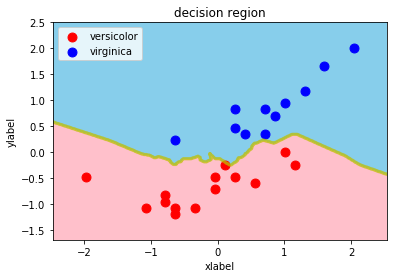

In [34]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel',
                    target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

# 標準化されたＸテストデータ、学習モデルの推定結果、学習済みモデル（フィッティングされたモデル）を入力する。
decision_region(norml_X_test, estimate_result5, kn_5_nn)
#decision_region(norml_X_test, estimate_result5, neigh5)
#学習前のモデルを入れても同じ結果になる？

# 【問題８】他の手法の学習

### ロジスティック回帰

In [37]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
lg_regg = clf1.fit(norml_X_train, y_train)

print("推定結果ＳＶＭ：{}".format(lg_regg.predict(norml_X_test)))
estimate_lg_regg = lg_regg.predict(norml_X_test)

推定結果ＳＶＭ：[1 2 1 2 1 2 2 1 1 2 2 2 1 1 1 1 2 1 1 2 2 1 2 1 2]


C:\Users\hirot\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
ac_score1 = accuracy_score(y_test, estimate_lg_regg)
print("正解率：{}".format(ac_score1))

pre_score1 = precision_score(y_test, estimate_lg_regg, average=None)
print("適合率：{}".format(pre_score1))

rcl_score1 = recall_score(y_test, estimate_lg_regg, average=None)
print("再現率：{}".format(rcl_score1))

fone_score1 = f1_score(y_test, estimate_lg_regg, average=None)
print("Ｆ値：{}".format(fone_score1))

print("混合行列：\n{}".format(confusion_matrix(y_test, estimate_lg_regg)))

正解率：0.92
適合率：[0.92307692 0.91666667]
再現率：[0.92307692 0.91666667]
Ｆ値：[0.92307692 0.91666667]
混合行列：
[[12  1]
 [ 1 11]]


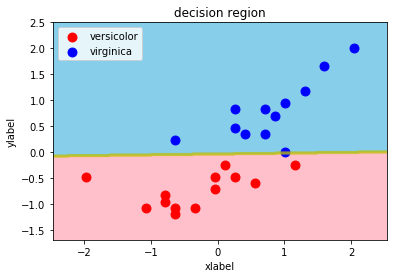

In [39]:
decision_region(norml_X_test, estimate_lg_regg, lg_regg)

## サポートベクタ―マシン

In [40]:
from sklearn.svm import SVC
clf2 = SVC(gamma='auto')
svm_iris = clf2.fit(norml_X_train, y_train)

print("推定結果ＳＶＭ：{}".format(svm_iris.predict(norml_X_test)))
estimate_svm = svm_iris.predict(norml_X_test)

ac_score2 = accuracy_score(y_test, estimate_svm)
print("正解率：{}".format(ac_score2))
pre_score2 = precision_score(y_test, estimate_svm, average=None)
print("適合率：{}".format(pre_score2))
rcl_score2 = recall_score(y_test, estimate_svm, average=None)
print("再現率：{}".format(rcl_score2))
fone_score2 = f1_score(y_test, estimate_svm, average=None)
print("Ｆ値：{}".format(fone_score2))
print("混合行列：\n{}".format(confusion_matrix(y_test, estimate_svm)))

推定結果ＳＶＭ：[1 2 1 2 1 2 2 1 1 1 2 2 1 1 1 1 2 1 1 2 2 1 2 1 2]
正解率：0.96
適合率：[0.92857143 1.        ]
再現率：[1.         0.91666667]
Ｆ値：[0.96296296 0.95652174]
混合行列：
[[13  0]
 [ 1 11]]


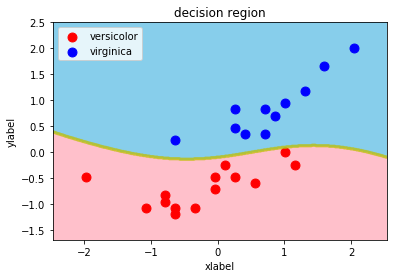

In [41]:
decision_region(norml_X_test, estimate_svm, svm_iris)

## 決定木 

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier()
DTC_iris = clf3.fit(norml_X_train, y_train)

print("推定結果ＤＴＣ：{}".format(DTC_iris.predict(norml_X_test)))
estimate_DTC = DTC_iris.predict(norml_X_test)

ac_score3 = accuracy_score(y_test, estimate_DTC)
print("正解率：{}".format(ac_score3))
pre_score3 = precision_score(y_test, estimate_DTC, average=None)
print("適合率：{}".format(pre_score3))
rcl_score3 = recall_score(y_test, estimate_DTC, average=None)
print("再現率：{}".format(rcl_score3))
fone_score3 = f1_score(y_test, estimate_DTC, average=None)
print("Ｆ値：{}".format(fone_score3))
print("混合行列：\n{}".format(confusion_matrix(y_test, estimate_DTC)))

推定結果ＤＴＣ：[1 2 1 2 1 2 2 1 1 1 2 2 1 1 1 1 2 1 1 2 2 1 2 1 2]
正解率：0.96
適合率：[0.92857143 1.        ]
再現率：[1.         0.91666667]
Ｆ値：[0.96296296 0.95652174]
混合行列：
[[13  0]
 [ 1 11]]


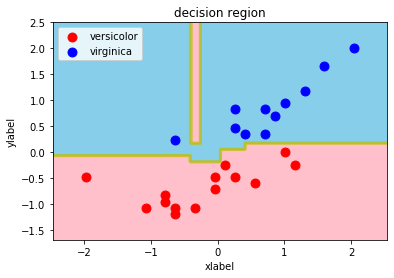

In [43]:
decision_region(norml_X_test, estimate_DTC, DTC_iris)

## ランダムフォレスト

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(max_depth=None, random_state=None)
RFC_iris = clf4.fit(norml_X_train, y_train)

print("推定結果ＲＦＣ：{}".format(RFC_iris.predict(norml_X_test)))
estimate_RFC = RFC_iris.predict(norml_X_test)

ac_score4 = accuracy_score(y_test, estimate_RFC)
print("正解率：{}".format(ac_score4))
pre_score4 = precision_score(y_test, estimate_RFC, average=None)
print("適合率：{}".format(pre_score4))
rcl_score4 = recall_score(y_test, estimate_RFC, average=None)
print("再現率：{}".format(rcl_score4))
fone_score4 = f1_score(y_test, estimate_RFC, average=None)
print("Ｆ値：{}".format(fone_score4))
print("混合行列：\n{}".format(confusion_matrix(y_test, estimate_RFC)))

推定結果ＲＦＣ：[1 2 1 2 1 2 2 1 1 1 2 2 1 1 1 1 2 1 1 2 2 1 2 1 2]
正解率：0.96
適合率：[0.92857143 1.        ]
再現率：[1.         0.91666667]
Ｆ値：[0.96296296 0.95652174]
混合行列：
[[13  0]
 [ 1 11]]


C:\Users\hirot\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


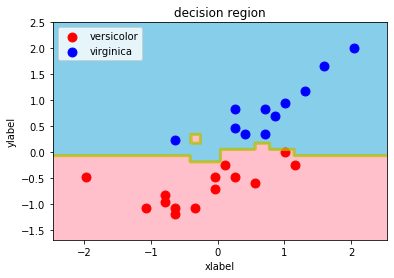

In [45]:
decision_region(norml_X_test, estimate_RFC, RFC_iris)

##  考察  
各モデルと指標値について

| 　         | 最近傍法 | ロジスティック | SVM  | 決定木 | ランダムF |
|------------|----------|----------------|------|--------|-----------|
| 正答率     | 0.96     | 0.92           | 0.96 | 0.96   | 0.96      |
| ２の適合率 | 0.93     | 0.923          | 0.93 | 0.93   | 0.93      |
| １の適合率 | 1        | 0.916          | 1    | 1      | 1         |
| ２の再現率 | 1        | 0.923          | 1    | 1      | 1         |
| １の再現率 | 0.92     | 0.916          | 0.92 | 0.92   | 0.92      |
| ２のF値    | 0.96     | 0.923          | 0.96 | 0.96   | 0.96      |
| １のF値    | 0.96     | 0.916          | 0.96 | 0.96   | 0.96      |

  
  
今回の結果では、ロジスティック以外はほぼ同じ結果となり比較が難しいこととなった。  
最近傍法、ＳＶＭ、決定木、ランダムＦの混合行列は［［13，0］，［1，11］］であって、1行2列目の成分がゼロである。  
したがって、「１の適合率」と「２の再現率」が１となっており、この４つのモデルでは「ラベル２ではない」ということを１００％で判断しているものと考える。  

なお訓練用データと検証用データの分割で、各モデルの指標値の結果が全く変わってくる。  
決定木やランダムＦでは、Ｖｅｒｓｉｃｏｌｏｒの領域が飛び地のように離れて形成されている部分があり、データ分割の結果によってはこの飛び地内に検証用データが存在することがある。  
このため現状の条件下では、決定木やランダムＦは過学習となりやすい状態であると考える。